In [21]:
library(tidyverse)
library(patchwork)
options(repr.plot.width=5, repr.plot.height=5)

# Distribuição *t* de Student: Biometrika. 1908, vol. 6, 1-15

<img src="img/William_Sealy_Gosset.jpg" alt="drawing" width="200"/>

## Teste $t$ de *Student* para uma média

In [2]:
X = c(2.92, 2.69, 2.99, 3.6, 2.83, 2.64, 2.53, 2.99, 2.67, 2.55)
X

[1] 2.92 2.69 2.99 3.60 2.83 2.64 2.53 2.99 2.67 2.55

In [3]:
(mu = 2.65) # média populacional segundo H0
(xb = mean(X)) # Média amostral
(n = length(X)) # Tamanho da amostra
(gl = n - 1) # Graus de liberdade
(s = sd(X)) # desvio padrão
(sxb = s/sqrt(n)) #erro apdrão da média

[1] 2.65

[1] 2.841

[1] 10

[1] 9

[1] 0.316349

[1] 0.1000383

In [4]:
(tc = (xb - 2.65) / sxb)  # t calculado

[1] 1.909268

Teste bicaudal

In [5]:
pt(-tc, df = gl, lower.tail = TRUE) * 2

[1] 0.08856526

Usando a função do R

In [6]:
t.test(X, mu = 2.65, alternative = "two.sided")


	One Sample t-test

data:  X
t = 1.9093, df = 9, p-value = 0.08857
alternative hypothesis: true mean is not equal to 2.65
95 percent confidence interval:
 2.614698 3.067302
sample estimates:
mean of x 
    2.841 


Teste unicaucal

In [7]:
pt(-tc, df = gl, lower.tail = TRUE)

[1] 0.04428263

Usando a função do R

In [8]:
t.test(X, mu = 2.65, alternative = "greater")


	One Sample t-test

data:  X
t = 1.9093, df = 9, p-value = 0.04428
alternative hypothesis: true mean is greater than 2.65
95 percent confidence interval:
 2.657618      Inf
sample estimates:
mean of x 
    2.841 


In [9]:
help(t.test)

## Teste $t$ de *Student* para duas amostras: Chacais dourados

<img src="img/Golden_jackals.jpg" alt="drawing" width="400"/>

### Teste $t$ de Welch - variâncias heterogêneas

Existe evidência de que o tamanho das mandíbulas de Chacais dourados seja diferente em machos e fêmeas?

In [10]:
jackal <- read.csv('datasets/jackal.csv', sep = ';', header = TRUE)
jackal

Comprimento,Sexo
120,Macho
107,Macho
110,Macho
116,Macho
114,Macho
111,Macho
113,Macho
117,Macho
114,Macho
112,Macho


In [11]:
jackal %>% group_by(Sexo) %>%
summarize(Medias = mean(Comprimento))

Sexo,Medias
Femea,108.6
Macho,113.4


In [12]:
jackal %>% group_by(Sexo) %>%
summarize(Desvio = sd(Comprimento))

Sexo,Desvio
Femea,2.270585
Macho,3.717825


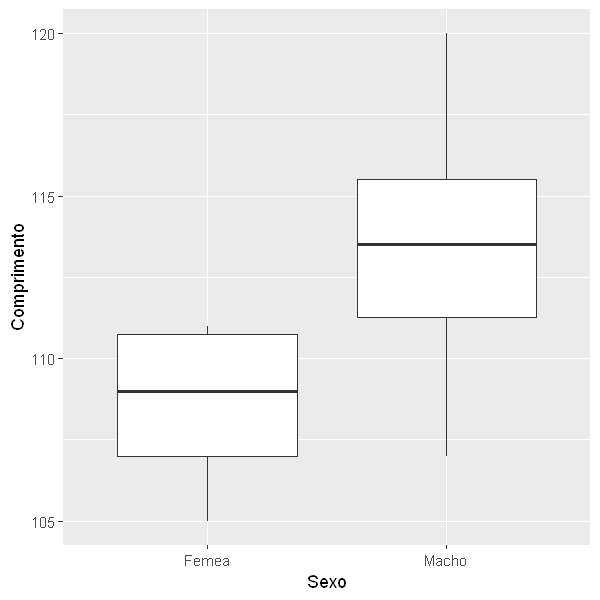

In [13]:
ggplot(jackal, aes(x = Sexo, y = Comprimento)) +
geom_boxplot()

In [14]:
t.test(Comprimento ~ Sexo, data = jackal, alternative = 'two.sided', var.equal = FALSE) # Variâncias heterogêneas


	Welch Two Sample t-test

data:  Comprimento by Sexo
t = -3.4843, df = 14.894, p-value = 0.00336
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -7.738105 -1.861895
sample estimates:
mean in group Femea mean in group Macho 
              108.6               113.4 


### Teste  𝑡  pareado: Hoffman et. al. (2003)

Dados retirados de: 

Hoffmann, William A., Birgit Orthen, and Paula Kielse Vargas do Nascimento. Comparative fire ecology of tropical savanna and forest trees. Functional Ecology 17.6 (2003): 720-726.

In [15]:
hof = read.csv("datasets/Hoffman_et_al_2003.csv", header = TRUE, sep = ";", dec = ',')
hof

Gênero,Cerrado,Floresta
Aspidosperma,0.82,1.28
Byrsonima,0.52,1.10
Didymopanax,0.43,1.36
Guapira,0.74,0.65
Hymenaea,1.38,1.30
Miconia,0.49,1.09
Myrsine,0.69,1.97
Ouratea,1.66,1.62
Salacia,0.77,0.47
Vochysia,1.09,1.92


In [16]:
n = nrow(hof)

hof_errbar = hof %>% summarise_at(
  vars(Cerrado, Floresta), list(media = mean, desvio = sd)
  ) %>% 
  gather(indicador,value,Cerrado_media:Floresta_desvio) %>% 
  separate(indicador, into = c("Vegetacao", "indicador")) %>% 
  spread(indicador, value)

hof_diff = hof %>% 
  mutate(Dif = Cerrado - Floresta)

df = data.frame(x = 1, xend = 2,
           y = hof_errbar[1,3], 
           yend = hof_errbar[2,3]) 

gerrbar = ggplot(data = hof_errbar,
                         aes(x = Vegetacao, y = media)) +
  geom_errorbar(aes(ymin = media - (desvio/sqrt(n))*1.96, 
                    ymax = media + (desvio/sqrt(n))*1.96), width=.1) +
  geom_point(size = 3) +
  theme_classic(base_size = 20) +
  theme(axis.title.y = element_text(size = 17)) +
  xlab('') + ylab('Espessura relativa da casca') +
  geom_segment(aes(x = x, y = y, xend = xend, yend = yend),
               colour = "red", linetype = 2, data = df)

gpaired = ggplot(data = hof) +
  geom_point(aes(x = rep(1, nrow(hof)), y = Cerrado)) +
  geom_point(aes(x = rep(2, nrow(hof)), y = Floresta)) +
  scale_x_continuous(name = '', breaks = c(1,2), 
                     labels = colnames(hof)[-1],
                     limits = c(0.5, 2.5)) +
  ylab("Espessura relativa da casca") +
  theme_classic(base_size = 20) +
  theme(axis.title.y = element_text(size = 17)) +
  geom_segment(aes(x = rep(1, nrow(hof)), y = Cerrado, 
                   xend = rep(2, nrow(hof)), yend = Floresta), 
               colour = ifelse(test = hof_diff$Dif <= 0, yes = "red", no = "blue"), linetype = 2)

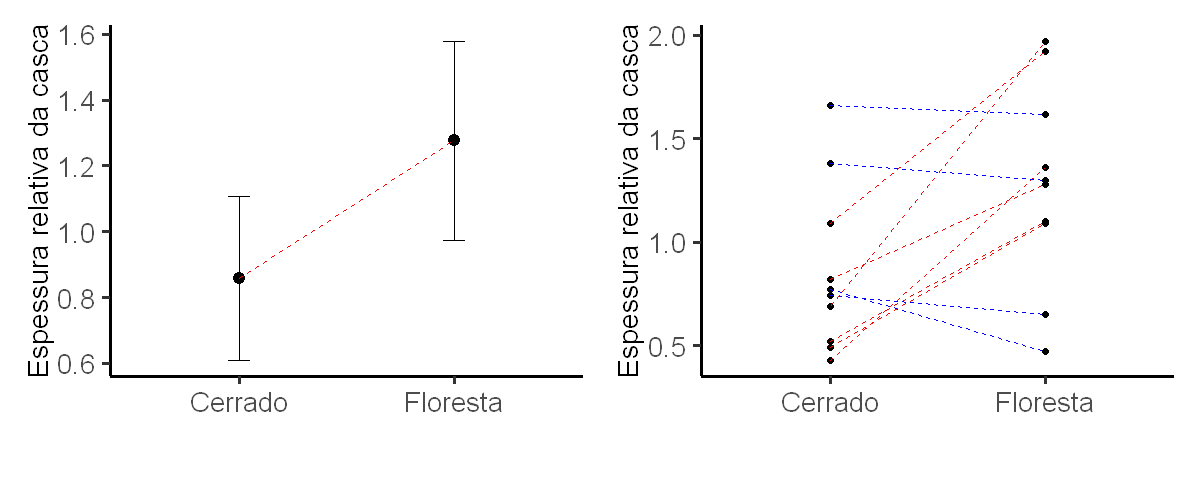

In [17]:
options(repr.plot.width=10, repr.plot.height=4)
gerrbar + gpaired

#### O teste t

In [18]:
ttest_casca = t.test(hof$Cerrado, hof$Floresta, 
                       alternative = 'two.sided', 
                       paired = TRUE)
ttest_casca


	Paired t-test

data:  hof$Cerrado and hof$Floresta
t = -2.5185, df = 9, p-value = 0.03285
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.79156068 -0.04243932
sample estimates:
mean of the differences 
                 -0.417 


O teste t pareado é **equivalente** ao teste t para uma amostra se este for conduzido sobre a diferença entre os pares de observações.

In [19]:
hof_diff

Gênero,Cerrado,Floresta,Dif
Aspidosperma,0.82,1.28,-0.46
Byrsonima,0.52,1.10,-0.58
Didymopanax,0.43,1.36,-0.93
Guapira,0.74,0.65,0.09
Hymenaea,1.38,1.30,0.08
Miconia,0.49,1.09,-0.60
Myrsine,0.69,1.97,-1.28
Ouratea,1.66,1.62,0.04
Salacia,0.77,0.47,0.30
Vochysia,1.09,1.92,-0.83


In [20]:
t.test(hof_diff$Dif, mu = 0, alternative = 'two.sided')


	One Sample t-test

data:  hof_diff$Dif
t = -2.5185, df = 9, p-value = 0.03285
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -0.79156068 -0.04243932
sample estimates:
mean of x 
   -0.417 
